## Anomaly Detection using CSE-CIC-IDS2018 Dataset
### By: Khaled El Arabi El Azzouzi<br>--- Hassan Fakih Osman <br>--- Obadah Nidal Ghizawi
### Professor: Umut Mennan Güder
### Dataset Source: https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csv
### Original Source: https://www.unb.ca/cic/datasets/ids-2018.html

#### We relied on the dataset from kaggle because the original dataset is quite large (> 400 GB), compared to the dataset from kaggle (2 GB)

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore') # To not display warnings

In [3]:
dataset_list = [
    pd.read_csv('./archive/03-02-2018.csv'),
    pd.read_csv('./archive/03-01-2018.csv'),
    pd.read_csv('./archive/02-23-2018.csv'),
    pd.read_csv('./archive/02-14-2018.csv') 
]

### Merge Datasets

In [4]:
dataset = pd.concat(dataset_list, ignore_index=True, axis=0)
del dataset_list # To save memory

### Dataset Overview

In [5]:
dataset.head(n=5) # Change n to display more rows

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


#### The dataset is made up 3476825 instances, all having 80 features

In [6]:
print(f"The dataset is made up of {len(dataset)} instances")

The dataset is made up of 3476825 instances


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476825 entries, 0 to 3476824
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    int64  
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    int64  
 9   Fwd Pkt Len Min    int64  
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    int64  
 13  Bwd Pkt Len Min    int64  
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

### Features

In [8]:
dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

### Class distribution
#### Notice the high class imbalance which could cause problems to our models later on

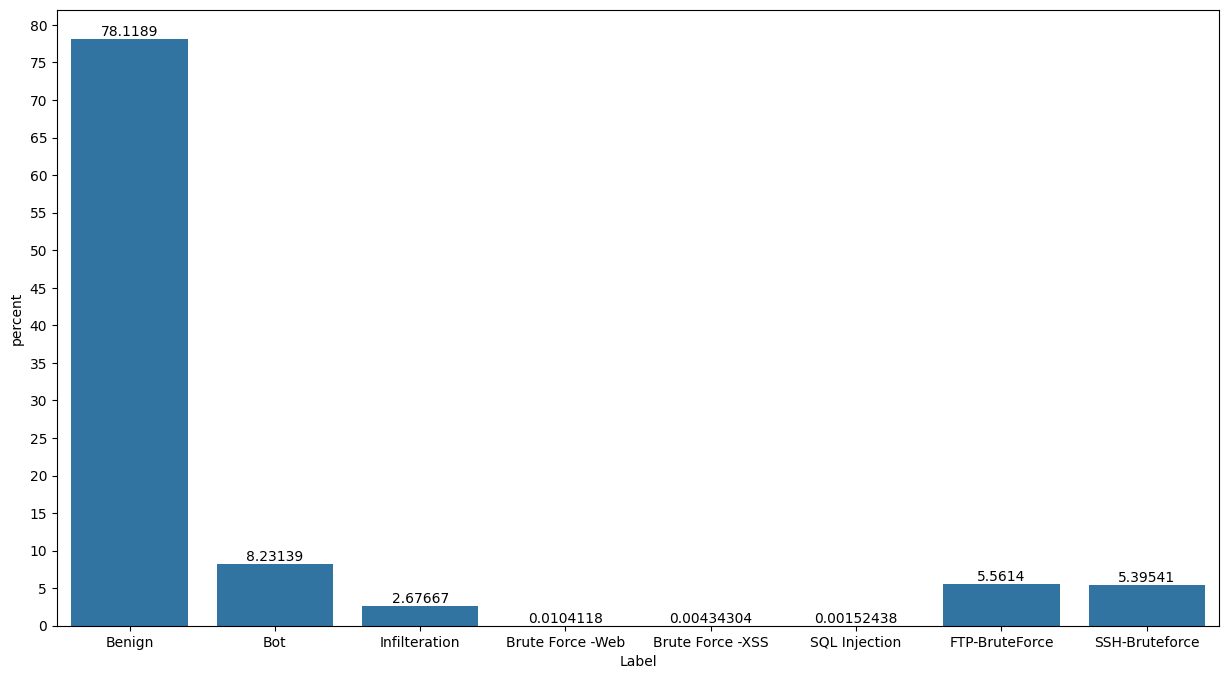

In [9]:
plt.figure(figsize=(15,8))
plt.yticks(np.arange(0,100, 5))
ax = sns.countplot(x="Label", data=dataset, stat='percent')

ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [10]:
negative_labels = ['Brute Force -Web', 'Brute Force -XSS', 'Infilteration', 'SQL Injection', 'Bot', 'SSH-Bruteforce',
                    'FTP-BruteForce']

dataset_eda = dataset.replace(negative_labels, "Malicious")

<Axes: xlabel='Bwd Pkts/s'>

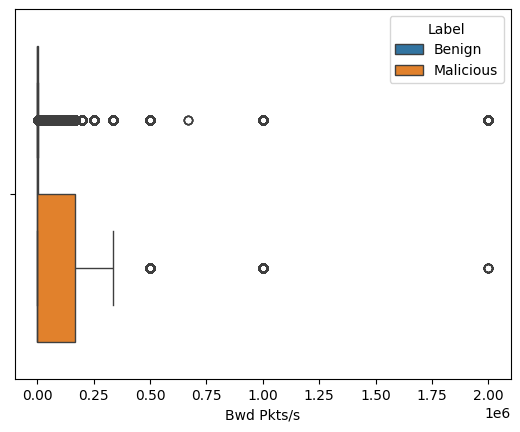

In [11]:
sns.boxplot(x="Bwd Pkts/s", hue="Label", data=dataset_eda)

<Axes: xlabel='Fwd Seg Size Min'>

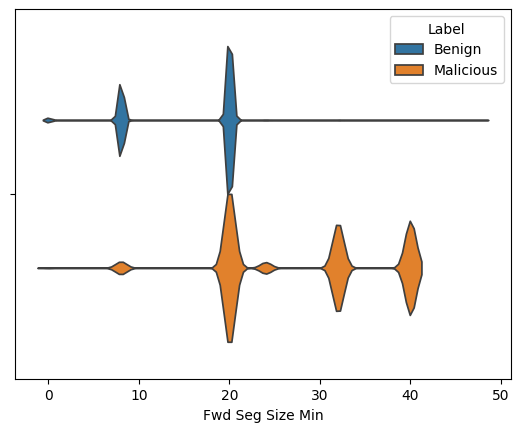

In [12]:
sns.violinplot(x="Fwd Seg Size Min", data=dataset_eda, hue="Label", inner=None)

<Axes: xlabel='Init Fwd Win Byts'>

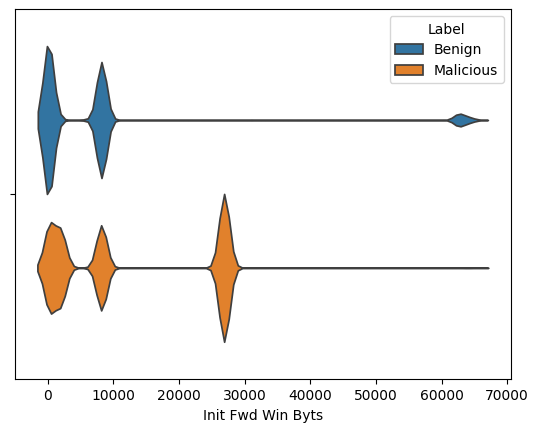

In [13]:
sns.violinplot(x="Init Fwd Win Byts", hue="Label", data=dataset_eda, inner=None)

## Data Cleaning

### Drop the 'Timestamp' and 'Dst Port' columns, because it doesn't bring any relavant clues to find the class label

In [11]:
dataset = dataset.drop(columns=["Timestamp", "Dst Port"])


### Drop rows that are classified as 'Label'
#### When downloading the data from Kaggle, some files may have some errors for example, including instances classifies as 'Label' which must be dropped. So you can use the code below to do so

In [12]:
dataset['Label'].unique() # Check all the classes available, if 'Label' is included then run the code below

array(['Benign', 'Bot', 'Infilteration', 'Brute Force -Web',
       'Brute Force -XSS', 'SQL Injection', 'FTP-BruteForce',
       'SSH-Bruteforce'], dtype=object)

In [16]:
value = 'Label'

indices_with_value = dataset.index[dataset['Label'] == value] # locate the rows with class 'Label'
indices_with_value

Index([], dtype='int64')

In [17]:
dataset = dataset.drop(indices_with_value) # remove the rows with class 'Label'

In [18]:
dataset['Label'].unique() # Now we only have the actual correct labels

array(['Benign', 'Bot', 'Infilteration', 'Brute Force -Web',
       'Brute Force -XSS', 'SQL Injection', 'FTP-BruteForce',
       'SSH-Bruteforce'], dtype=object)

### Encode the 'Protocol' column using One-Hot Encoding because it is a categorical value

In [13]:
dataset["Protocol"].unique()

array([ 6,  0, 17], dtype=int64)

In [14]:
dataset = dataset.astype({"Protocol": str}) # Change the column data type to string
dataset["Protocol"].unique()

array(['6', '0', '17'], dtype=object)

In [15]:
dataset = pd.get_dummies(dataset, columns=['Protocol'], drop_first=True)

In [16]:
dataset.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False,True


### Dropping null values
#### There are 10423 rows that carries values that are 'null'

In [17]:
num_rows_with_nan = dataset.isna().sum().sum() # Sum total number of nan values present

print("Number of rows with NaN values:", num_rows_with_nan)

Number of rows with NaN values: 10423


### Null values present only in the 'Flow Byts/s' column

In [18]:
dataset.columns.to_series()[dataset.isna().any()]

Flow Byts/s    Flow Byts/s
dtype: object

In [19]:
dataset = dataset.dropna()

### Replace infinite values with the maximum value in its column
#### There are 12156 rows that carries values that are 'infinite'

In [20]:
dataset = dataset.replace(np.inf, np.nan) # replace them with nan because its simpler
print("Number of rows with infinite values:", dataset.isna().sum().sum())

Number of rows with infinite values: 12156


### 'Flow Byts/s' and 'Flow Pkts/s' columns contain values that are infinite

In [21]:
dataset.columns.to_series()[dataset.isna().any()]

Flow Byts/s    Flow Byts/s
Flow Pkts/s    Flow Pkts/s
dtype: object

In [23]:
print(f'Max of Flow Bytes/s: { max(dataset["Flow Byts/s"]) }')
print(f'Max of Flow Pkts/s: { max(dataset["Flow Pkts/s"]) }')

Max of Flow Bytes/s: 850000000.0
Max of Flow Pkts/s: 4000000.0


In [24]:
# Replace 'nan' with the maximum value in its column
dataset['Flow Byts/s'] = dataset['Flow Byts/s'].replace(np.nan, max(dataset["Flow Byts/s"]))
dataset['Flow Pkts/s'] = dataset['Flow Pkts/s'].replace(np.nan, max(dataset['Flow Pkts/s']))

In [25]:
dataset.isna().sum().sum() # Check if any null values left

0

In [26]:
dataset.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,...,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06,3.466402e+06
mean,1.238337e+07,6.292127e+00,7.836089e+00,4.243215e+02,6.228848e+03,1.874768e+02,1.033383e+01,4.645040e+01,6.056909e+01,3.478080e+02,...,2.344717e+00,1.878525e+01,1.029072e+05,4.930967e+04,1.650833e+05,7.167389e+04,5.802752e+06,3.204592e+05,6.405414e+06,5.410609e+06
std,6.937417e+08,8.910576e+01,2.215480e+02,1.167076e+04,3.146808e+05,2.765034e+02,2.577797e+01,5.662378e+01,9.142360e+01,5.080336e+02,...,1.548496e+01,8.319987e+00,1.615051e+06,9.605888e+05,2.157299e+06,1.375186e+06,2.983353e+08,2.101050e+08,8.373478e+08,2.029158e+07
min,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.090000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.223700e+04,2.000000e+00,1.000000e+00,4.400000e+01,9.500000e+01,4.000000e+01,0.000000e+00,3.500000e+01,0.000000e+00,8.400000e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.550098e+06,7.000000e+00,6.000000e+00,4.450000e+02,5.820000e+02,3.260000e+02,0.000000e+00,7.380000e+01,1.120060e+02,4.880000e+02,...,4.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,5.809100e+04,1.231180e+05,9.789747e+06,1.563604e+08,6.444000e+04,1.460000e+03,1.121703e+04,1.576084e+04,6.516000e+04,...,1.829000e+04,4.800000e+01,1.140000e+08,7.490000e+07,1.140000e+08,1.140000e+08,3.394503e+11,2.432682e+11,9.797810e+11,1.260300e+10


In [27]:
dataset["Label"].value_counts()

Label
Benign              2706068
Bot                  286191
FTP-BruteForce       193354
SSH-Bruteforce       187589
Infilteration         92634
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64

- ### Encoding Labels
    - Benign --> 0
    - Bot --> 1
    - Brute Force -Web --> 2
    - Brute Force -XSS --> 3
    - FTP-BruteForce --> 4
    - Infilteration --> 5
    - SQL Injection -> 6
    - SSH-Bruteforce: 7

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dataset['Label'])

mapping = dict(zip(le.classes_, le.transform(le.classes_)))
dataset["Label"] = le.transform(dataset["Label"])

mapping

{'Benign': 0,
 'Bot': 1,
 'Brute Force -Web': 2,
 'Brute Force -XSS': 3,
 'FTP-BruteForce': 4,
 'Infilteration': 5,
 'SQL Injection': 6,
 'SSH-Bruteforce': 7}

### Changing column datatypes to 'float'
#### Due to some kind of formatting problem, if all the columns carry data of type 'object'<br>change it to data of type 'float' as shown below. And this is due to some files containing instances of class 'Label' as discussed previously which makes pandas give type 'object' to all columns

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3466402 entries, 0 to 3476824
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow Duration      int64  
 1   Tot Fwd Pkts       int64  
 2   Tot Bwd Pkts       int64  
 3   TotLen Fwd Pkts    int64  
 4   TotLen Bwd Pkts    float64
 5   Fwd Pkt Len Max    int64  
 6   Fwd Pkt Len Min    int64  
 7   Fwd Pkt Len Mean   float64
 8   Fwd Pkt Len Std    float64
 9   Bwd Pkt Len Max    int64  
 10  Bwd Pkt Len Min    int64  
 11  Bwd Pkt Len Mean   float64
 12  Bwd Pkt Len Std    float64
 13  Flow Byts/s        float64
 14  Flow Pkts/s        float64
 15  Flow IAT Mean      float64
 16  Flow IAT Std       float64
 17  Flow IAT Max       float64
 18  Flow IAT Min       float64
 19  Fwd IAT Tot        float64
 20  Fwd IAT Mean       float64
 21  Fwd IAT Std        float64
 22  Fwd IAT Max        float64
 23  Fwd IAT Min        float64
 24  Bwd IAT Tot        float64
 25  Bwd IAT Mean       floa

### Locate columns with data of type 'object'

In [67]:
string_columns = []

for column in dataset.columns:
    if dataset[column].dtype == 'object':
        string_columns.append(column)

# Print columns containing string values
print("Columns containing string values:")
print(string_columns)

Columns containing string values:
[]


In [ ]:
dataset[string_columns]

In [69]:
dataset[string_columns] = dataset[string_columns].astype(float) # Change data types of string columns to float

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3466402 entries, 0 to 3476824
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow Duration      int64  
 1   Tot Fwd Pkts       int64  
 2   Tot Bwd Pkts       int64  
 3   TotLen Fwd Pkts    int64  
 4   TotLen Bwd Pkts    float64
 5   Fwd Pkt Len Max    int64  
 6   Fwd Pkt Len Min    int64  
 7   Fwd Pkt Len Mean   float64
 8   Fwd Pkt Len Std    float64
 9   Bwd Pkt Len Max    int64  
 10  Bwd Pkt Len Min    int64  
 11  Bwd Pkt Len Mean   float64
 12  Bwd Pkt Len Std    float64
 13  Flow Byts/s        float64
 14  Flow Pkts/s        float64
 15  Flow IAT Mean      float64
 16  Flow IAT Std       float64
 17  Flow IAT Max       float64
 18  Flow IAT Min       float64
 19  Fwd IAT Tot        float64
 20  Fwd IAT Mean       float64
 21  Fwd IAT Std        float64
 22  Fwd IAT Max        float64
 23  Fwd IAT Min        float64
 24  Bwd IAT Tot        float64
 25  Bwd IAT Mean       floa

### Dropping negative values
#### Some rows carry values that are negative which is incorrect therefore it was dropped

In [31]:
dataset = dataset[dataset.ge(0).all(axis=1)]

In [32]:
dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_17,Protocol_6
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
6,5964033,3,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476818,10056041,5,5,1136,2668.0,578,0,227.200000,311.186761,1334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
3476820,10156986,5,5,1089,1923.0,587,0,217.800000,299.745225,1334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
3476822,5095331,3,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True
3476823,5235511,3,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,True


### Dropping duplicates
#### There exist 407231 rows that are duplicates of some other rows

In [33]:
print(f"Number of duplicates is: {dataset.duplicated().sum().sum()}")

Number of duplicates is: 407231


In [34]:
dataset = dataset.drop_duplicates(ignore_index=True)

#### Our dataset dropped from 3476825 to 1475212 rows after data cleaning
##### Mostly due to extreme number of duplicates

In [35]:
len(dataset)

1475212

### Rearranging the dataset columns

In [36]:
features = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min',
       'Protocol_17', 'Protocol_6', 'Label']

dataset = dataset[features]
dataset.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
   

In [37]:
dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
3,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
4,5964033,3,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475207,10056041,5,5,1136,2668.0,578,0,227.200000,311.186761,1334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
1475208,10156986,5,5,1089,1923.0,587,0,217.800000,299.745225,1334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
1475209,5095331,3,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0
1475210,5235511,3,1,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0


## Data Transformations
###  Normalizing Dataset Using MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(dataset[dataset.columns[:78]])

In [39]:
normalized_dataset = pd.DataFrame(normalized_features, columns=dataset.columns[:78])
normalized_dataset["Label"] = dataset["Label"]

### Result after normalizing

In [40]:
normalized_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,0.001178,0.000138,0.000049,0.000064,2.413015e-05,0.003135,0.0,0.005478,0.005554,0.022406,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
1,0.000002,0.000017,0.000000,0.000004,0.000000e+00,0.000590,0.0,0.001694,0.001705,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
2,0.002332,0.000172,0.000114,0.000126,6.732522e-05,0.005975,0.0,0.008802,0.008210,0.022406,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
3,0.002283,0.000138,0.000097,0.000150,3.927464e-05,0.008023,0.0,0.012729,0.011667,0.022406,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
4,0.049700,0.000034,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475207,0.083800,0.000069,0.000032,0.000132,1.706314e-05,0.008970,0.0,0.020255,0.019744,0.020473,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
1475208,0.084642,0.000069,0.000032,0.000127,1.229851e-05,0.009109,0.0,0.019417,0.019018,0.020473,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
1475209,0.042461,0.000034,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
1475210,0.043629,0.000034,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0


#### Breaking down the dataset into two, X for input and Y for output

In [41]:
X = normalized_dataset
y = normalized_dataset['Label']
X = X.drop(columns = ['Label'])

### Feature Selection
#### Feature selection was done using 'SelectKBest' from sklearn which selects the K best features according to some scoring function.<br>The scoring function used for 'SelectKBest' is 'f_classif' which computes the ANOVA F-values for the provided samples
##### The top 10 from the 78 features were selected

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features

# Fit selector to the data
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]
print(f"shape of selected features: {selected_features.shape}")

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Print selected features
print("Selected Features:")
print(selected_features)

# Print scores of selected features
print("Scores of Selected Features:")
print(selector.scores_[selector.get_support()])

shape of selected features: (10,)
Selected Features:
Index(['Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Pkt Len Max',
       'RST Flag Cnt', 'ECE Flag Cnt', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min'],
      dtype='object')
Scores of Selected Features:
[  37770.97904035   14620.58351392   30851.72180454   20675.46677502
   64395.19309433   64394.99247376   79660.29736373   24073.52804642
   30767.16524832 1277836.03042412]


### Feature Score

In [43]:
scores = pd.DataFrame(selector.scores_[selector.get_support()] , index=selected_features, columns=['Score'])
scores.sort_values('Score', ascending=False)

,Score
Fwd Seg Size Min,1.277836e+06
Init Fwd Win Byts,7.966030e+04
RST Flag Cnt,6.439519e+04
ECE Flag Cnt,6.439499e+04
Bwd Pkt Len Max,3.777098e+04
Bwd Pkt Len Std,3.085172e+04
Fwd Act Data Pkts,3.076717e+04
Init Bwd Win Byts,2.407353e+04
Pkt Len Max,2.067547e+04
Bwd Pkt Len Mean,1.462058e+04


### Dataset after feature selection

In [44]:
df_c = pd.concat([X_selected, y], axis=1)
df_c

,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Pkt Len Max,RST Flag Cnt,ECE Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Label
0,0.022406,0.015909,0.030734,0.022406,1.0,1.0,0.125002,0.001816,0.001559,0.0,0
1,0.000000,0.000000,0.000000,0.000583,0.0,0.0,0.001877,0.000000,0.000000,0.0,0
2,0.022406,0.020715,0.029837,0.022406,1.0,1.0,0.125002,0.015976,0.001949,0.0,0
3,0.022406,0.013943,0.028659,0.022406,1.0,1.0,0.125002,0.015976,0.001949,0.0,0
4,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.125002,0.445563,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1475207,0.020473,0.015750,0.034261,0.020473,0.0,0.0,0.125002,0.000870,0.000780,0.0,0
1475208,0.020473,0.011352,0.027611,0.020473,0.0,0.0,0.125002,0.474723,0.000780,0.0,0
1475209,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.125002,0.445563,0.000000,0.0,0
1475210,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.125002,0.652781,0.000000,0.0,0


### Correlation Heatmap of the 10 features

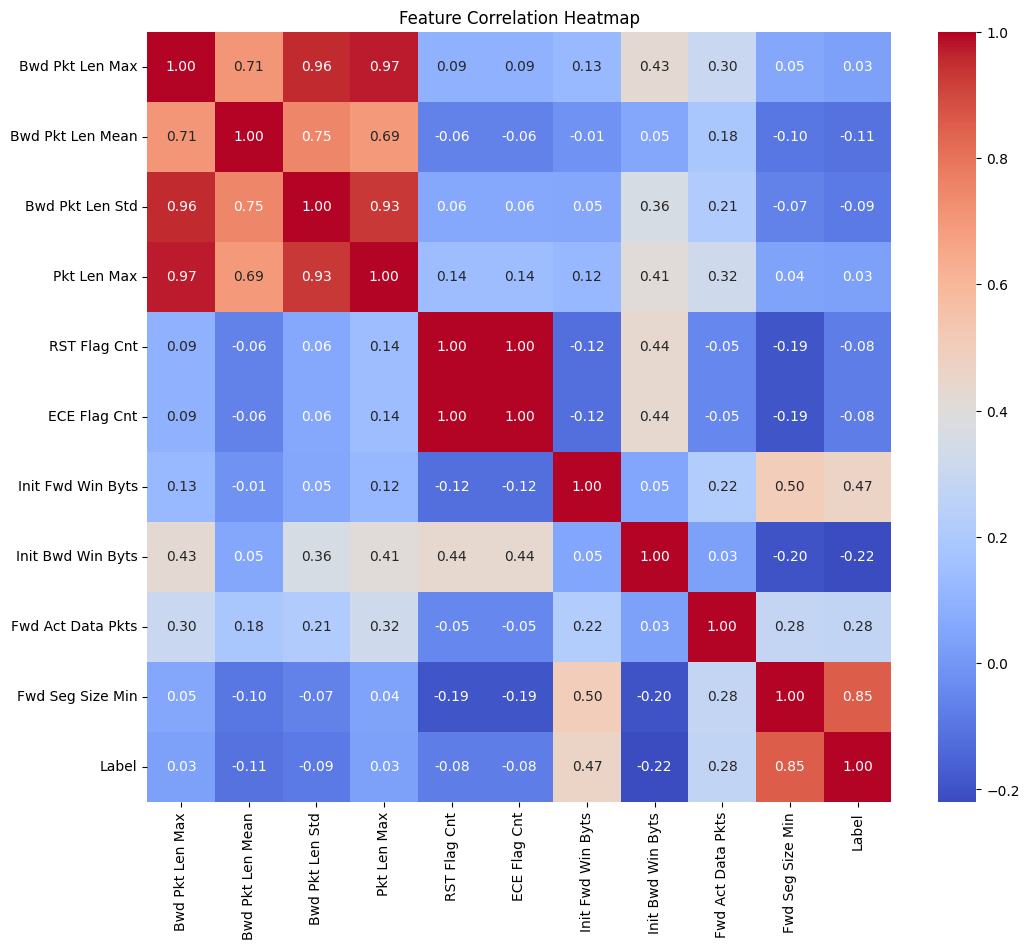

In [45]:
# Calculate the correlation matrix
correlation_matrix = df_c.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.savefig('corr_plot.png')
plt.show()

## Model Training
#### Splitting the data into training and testing sets; 70% training and 30% testing

In [46]:
from sklearn.model_selection import train_test_split

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [47]:
X_test

,Bwd Pkt Len Max,Bwd Pkt Len Mean,Bwd Pkt Len Std,Pkt Len Max,RST Flag Cnt,ECE Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min
32123,0.001719,0.000952,0.002521,0.005003,1.0,1.0,0.125002,0.003342,0.000390,0.0
682235,0.018094,0.005677,0.018103,0.018094,1.0,1.0,0.125002,0.954589,0.002729,0.0
263175,0.003545,0.001705,0.005416,0.003545,0.0,0.0,0.125002,0.002152,0.000390,0.0
572072,0.022406,0.029400,0.031477,0.022406,1.0,1.0,0.125002,0.016587,0.007018,0.0
761526,0.007489,0.003601,0.011441,0.007489,0.0,0.0,0.125002,0.002274,0.000390,0.0
...,...,...,...,...,...,...,...,...,...,...
1443857,0.022406,0.020223,0.031199,0.022406,0.0,0.0,0.125002,0.015656,0.001559,0.0
745146,0.018002,0.005833,0.019043,0.018002,1.0,1.0,0.125002,0.959060,0.001949,0.0
880778,0.018002,0.006667,0.020168,0.018002,0.0,0.0,0.125002,0.959304,0.001949,0.0
1378569,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000977,0.000000,0.000000,0.0


## Voting Classifier
### Made up of RandomForestClassifier, AdaBoostClassifier, and DecisionTreeClassifier

In [87]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

models = [
    ('dtc', DecisionTreeClassifier()),
    ('rfc', RandomForestClassifier()),
    ('abc', AdaBoostClassifier())
]

voting = VotingClassifier(estimators=models)
voting.fit(X_train, y_train)

predictions = voting.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Results
print(f"Accuracy of model: {accuracy}\n")

report = classification_report(y_test, predictions)
print(report)

Accuracy of model: 0.9807530662231904

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    362449
           1       1.00      1.00      1.00     42711
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        18
           4       0.84      1.00      0.91        21
           5       0.65      0.16      0.26      9157
           6       1.00      0.53      0.70        15
           7       1.00      1.00      1.00     28157

    accuracy                           0.98    442564
   macro avg       0.93      0.83      0.86    442564
weighted avg       0.98      0.98      0.98    442564



### Confusion Matrix of Voting Classifier

In [88]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

df_matrix = pd.DataFrame(conf_matrix, index=mapping.keys(), columns=mapping.keys())
df_matrix

,Benign,Bot,Brute Force -Web,Brute Force -XSS,FTP-BruteForce,Infilteration,SQL Injection,SSH-Bruteforce
Benign,361634,9,0,0,0,804,0,2
Bot,9,42702,0,0,0,0,0,0
Brute Force -Web,1,0,35,0,0,0,0,0
Brute Force -XSS,0,0,0,18,0,0,0,0
FTP-BruteForce,0,0,0,0,21,0,0,0
Infilteration,7682,0,0,0,0,1475,0,0
SQL Injection,7,0,0,0,0,0,8,0
SSH-Bruteforce,0,0,0,0,4,0,0,28153


## Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier() # initialize the model
model.fit(X_train, y_train) # train the model

# Evaluate the model by letting it classify the testing data and compare the results with the actual labels
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Results
print(f"Accuracy of model: {accuracy}\n")

report = classification_report(y_test, predictions)
print(report)

Accuracy of model: 0.9797701575365371

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    362449
           1       1.00      1.00      1.00     42711
           2       0.97      0.97      0.97        36
           3       1.00      1.00      1.00        18
           4       0.84      1.00      0.91        21
           5       0.54      0.18      0.27      9157
           6       0.91      0.67      0.77        15
           7       1.00      1.00      1.00     28157

    accuracy                           0.98    442564
   macro avg       0.90      0.85      0.86    442564
weighted avg       0.97      0.98      0.97    442564



### Confustion Matrix of Decision Tree Classifier

In [51]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

df_matrix = pd.DataFrame(conf_matrix, index=mapping.keys(), columns=mapping.keys())
df_matrix

,Benign,Bot,Brute Force -Web,Brute Force -XSS,FTP-BruteForce,Infilteration,SQL Injection,SSH-Bruteforce
Benign,361029,9,1,0,0,1409,1,0
Bot,8,42702,0,0,0,1,0,0
Brute Force -Web,1,0,35,0,0,0,0,0
Brute Force -XSS,0,0,0,18,0,0,0,0
FTP-BruteForce,0,0,0,0,21,0,0,0
Infilteration,7513,1,0,0,0,1643,0,0
SQL Injection,4,0,0,0,0,1,10,0
SSH-Bruteforce,0,0,0,0,4,0,0,28153


## Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()# initialize the model
model.fit(X_train, y_train) # train the model

# Evaluate the model by letting it classify the testing data and compare the results with the actual labels
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Results
print(f"Accuracy of model: {accuracy}\n")

report = classification_report(y_test, predictions)
print(report)

Accuracy of model: 0.9805316293236684

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    362449
           1       1.00      1.00      1.00     42711
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        18
           4       0.84      1.00      0.91        21
           5       0.61      0.17      0.26      9157
           6       1.00      0.67      0.80        15
           7       1.00      1.00      1.00     28157

    accuracy                           0.98    442564
   macro avg       0.93      0.85      0.87    442564
weighted avg       0.98      0.98      0.98    442564



### Confusion Matrix of Random Forest Classifier

In [71]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

df_matrix = pd.DataFrame(conf_matrix, index=mapping.keys(), columns=mapping.keys())
df_matrix

,Benign,Bot,Brute Force -Web,Brute Force -XSS,FTP-BruteForce,Infilteration,SQL Injection,SSH-Bruteforce
Benign,361470,9,0,0,0,968,0,2
Bot,8,42703,0,0,0,0,0,0
Brute Force -Web,1,0,35,0,0,0,0,0
Brute Force -XSS,0,0,0,18,0,0,0,0
FTP-BruteForce,0,0,0,0,21,0,0,0
Infilteration,7619,0,0,0,0,1538,0,0
SQL Injection,4,0,0,0,0,1,10,0
SSH-Bruteforce,0,0,0,0,4,0,0,28153


## K-Nearest Neighbors

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

model = KNeighborsClassifier()# initialize the model
model.fit(X_train, y_train) # train the model

# Evaluate the model by letting it classify the testing data and compare the results with the actual labels
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# Results
print(f"Accuracy of model: {accuracy}\n")

report = classification_report(y_test, predictions)
print(report)

Accuracy of model: 0.9802243291365769

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    362449
           1       1.00      1.00      1.00     42711
           2       0.95      0.97      0.96        36
           3       1.00      1.00      1.00        18
           4       0.84      1.00      0.91        21
           5       0.58      0.17      0.26      9157
           6       1.00      0.53      0.70        15
           7       1.00      1.00      1.00     28157

    accuracy                           0.98    442564
   macro avg       0.92      0.83      0.85    442564
weighted avg       0.97      0.98      0.97    442564



In [90]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

df_matrix = pd.DataFrame(conf_matrix, index=mapping.keys(), columns=mapping.keys())
df_matrix

,Benign,Bot,Brute Force -Web,Brute Force -XSS,FTP-BruteForce,Infilteration,SQL Injection,SSH-Bruteforce
Benign,361340,13,0,0,0,1093,0,3
Bot,10,42699,0,0,0,2,0,0
Brute Force -Web,1,0,35,0,0,0,0,0
Brute Force -XSS,0,0,0,18,0,0,0,0
FTP-BruteForce,0,0,0,0,21,0,0,0
Infilteration,7617,1,1,0,0,1538,0,0
SQL Injection,5,0,1,0,0,1,8,0
SSH-Bruteforce,0,0,0,0,4,0,0,28153


## Isolation Forest

In [48]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(random_state=42)
model.fit(X_train)

# Evaluate the model on the testing set
anomaly_scores = model.decision_function(X_test)

In [49]:
anomaly_scores

array([ 0.05388926,  0.02147573,  0.08930968, ...,  0.08039068,
        0.07542133, -0.02235838])

### After getting the anomaly scores of our testing data, we have to decide on a threshold that will determine which data is considered as an 'Benign' data (If anomaly_score < threshold) or an 'Infilteration' data (If anomaly_score > threshold).

#### But some certain threshold maximizes the accuracy, another maximizes the recall or precision, so the same algorithm is repeated to find the optimal score that suits all the metrics

#### Accuracy

In [64]:
from sklearn.metrics import accuracy_score

# Define a range of threshold values
thresholds = np.linspace(min(anomaly_scores), max(anomaly_scores), num=100)

# Initialize variables to store the best threshold and corresponding accuracy score
best_threshold = None
best_accuracy = 0

# Iterate over each threshold value
for threshold in thresholds:
    # Convert anomaly scores to binary predictions based on the threshold
    predictions = (anomaly_scores >= threshold).astype(int)
    
    # Compute accuracy score
    accuracy = accuracy_score(y_test, predictions)
    
    # Update the best threshold and accuracy score if a new maximum is found
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

# Results
print("Best Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy)

Best Threshold: 0.09228327190674962
Best Accuracy: 0.7934287470286784


In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Classify instances as normal (1) or anomalous (-1) based on the anomaly scores
predictions = (anomaly_scores >= best_threshold).astype(int)

# Evaluate the performance of the Isolation Forest model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

In [66]:
## --- Results ----
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.7934287470286784
Confusion Matrix:
 [[351143  11306      0      0      0      0      0      0]
 [ 42711      0      0      0      0      0      0      0]
 [    36      0      0      0      0      0      0      0]
 [    18      0      0      0      0      0      0      0]
 [    21      0      0      0      0      0      0      0]
 [  8940    217      0      0      0      0      0      0]
 [    15      0      0      0      0      0      0      0]
 [ 28157      0      0      0      0      0      0      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89    362449
           1       0.00      0.00      0.00     42711
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00      9157
           6       0.00      0.00      0.00        15
           7       0.0

### Precision

In [53]:
from sklearn.metrics import precision_score

# defining different thresholds
thresholds = np.linspace(min(anomaly_scores), max(anomaly_scores), num=100)

# Initialize variables to store the best threshold and corresponding precision score
best_threshold = None
best_precision = 0

# Iterate over each threshold value
for threshold in thresholds: 
    # Convert anomaly scores to binary predictions based on the threshold
    predictions = (anomaly_scores >= threshold).astype(int)

    # Compute precision score
    precision = precision_score(y_test, predictions, average='weighted')

    # Update the best threshold and precision score if a new maximum is found
    if precision > best_precision:
        best_precision = precision
        best_threshold = threshold
    
# Results
print("Best Threshold:", best_threshold)
print("Best Precision:", best_precision)

Best Threshold: -0.13585380807889758
Best Precision: 0.7526082391594607


In [55]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score
# Classify instances as normal (1) or anomalous (-1) based on the anomaly scores
predictions = (anomaly_scores >= best_threshold).astype(int)

# Evaluate the performance of the Isolation Forest model
precision = precision_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

In [56]:
# ---- Results ----
print("Precision:", precision)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Precision: 0.7526082391594607
Confusion Matrix:
 [[  6722 355727      0      0      0      0      0      0]
 [     1  42710      0      0      0      0      0      0]
 [    17     19      0      0      0      0      0      0]
 [    18      0      0      0      0      0      0      0]
 [     0     21      0      0      0      0      0      0]
 [   646   8511      0      0      0      0      0      0]
 [     4     11      0      0      0      0      0      0]
 [     0  28157      0      0      0      0      0      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.02      0.04    362449
           1       0.10      1.00      0.18     42711
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00      9157
           6       0.00      0.00      0.00        15
           7       0.

### Recall

In [57]:
from sklearn.metrics import recall_score

# defining different thresholds
thresholds = np.linspace(min(anomaly_scores), max(anomaly_scores), num=100)

# Initialize variables to store the best threshold and corresponding recall score
best_threshold = None
best_recall = 0

# Iterate over each threshold value
for threshold in thresholds:
    # Convert anomaly scores to binary predictions based on the threshold
    predictions = (anomaly_scores >= threshold).astype(int)

    # Compute the recall
    recall = recall_score(y_test, predictions, average='weighted')

    # Update the best threshold and recall score if a new maximum is found
    if recall > best_recall:
        best_recall = recall
        best_threshold = threshold
    
# Results
print("Best Threshold:", best_threshold)
print("Best Recall:", best_recall)

Best Threshold: 0.09228327190674962
Best Recall: 0.7934287470286784


In [58]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score
# Classify instances as normal (1) or anomalous (-1) based on the anomaly scores
predictions = (anomaly_scores >= best_threshold).astype(int)

# Evaluate the performance of the Isolation Forest model
recall = recall_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

In [59]:
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Recall: 0.7934287470286784
Confusion Matrix:
 [[351143  11306      0      0      0      0      0      0]
 [ 42711      0      0      0      0      0      0      0]
 [    36      0      0      0      0      0      0      0]
 [    18      0      0      0      0      0      0      0]
 [    21      0      0      0      0      0      0      0]
 [  8940    217      0      0      0      0      0      0]
 [    15      0      0      0      0      0      0      0]
 [ 28157      0      0      0      0      0      0      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89    362449
           1       0.00      0.00      0.00     42711
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00      9157
           6       0.00      0.00      0.00        15
           7       0.00 

### F1-score

In [61]:
from sklearn.metrics import f1_score

# defining different thresholds
thresholds = np.linspace(min(anomaly_scores), max(anomaly_scores), num=100)

# Initialize variables to store the best threshold and corresponding recall score
best_threshold = None
best_f1 = 0

# Iterate over each threshold value
for threshold in thresholds:
    # Convert anomaly scores to binary predictions based on the threshold
    predictions = (anomaly_scores >= threshold).astype(int)

    # Compute the recall
    f1 = f1_score(y_test, predictions, average='weighted')

    # Update the best threshold and recall score if a new maximum is found
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
    
# Results
print("Best Threshold:", best_threshold)
print("Best F1-score:", best_recall)

Best Threshold: 0.09228327190674962
Best F1-score: 0.7934287470286784


In [62]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
# Classify instances as normal (1) or anomalous (-1) based on the anomaly scores
predictions = (anomaly_scores >= best_threshold).astype(int)

# Evaluate the performance of the Isolation Forest model
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

In [63]:
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

F1-score: 0.7248420419458277
Confusion Matrix:
 [[351143  11306      0      0      0      0      0      0]
 [ 42711      0      0      0      0      0      0      0]
 [    36      0      0      0      0      0      0      0]
 [    18      0      0      0      0      0      0      0]
 [    21      0      0      0      0      0      0      0]
 [  8940    217      0      0      0      0      0      0]
 [    15      0      0      0      0      0      0      0]
 [ 28157      0      0      0      0      0      0      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89    362449
           1       0.00      0.00      0.00     42711
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00      9157
           6       0.00      0.00      0.00        15
           7       0.0

### Anomaly Scores Plot

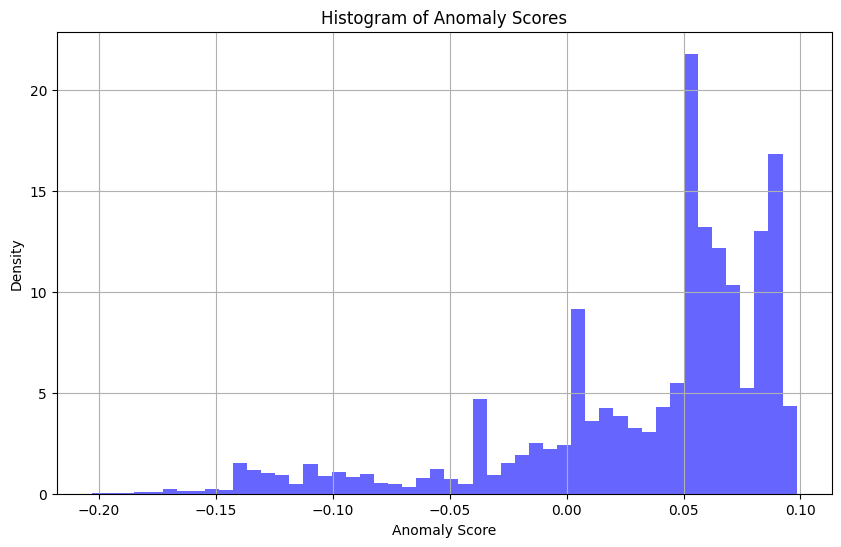

In [60]:
# Plot the anomaly scores
plt.figure(figsize=(10, 6))

plt.hist(anomaly_scores, bins=50, density=True, alpha=0.6, color='blue')

plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.title('Histogram of Anomaly Scores')
plt.grid(True)
plt.show()